In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud

# Charge file with text .txt
with open("Downloads/pensamentcriticempatic.txt", 'r', encoding="cp1252") as f:
    text = f.read()

<h2 style="color:#c71585">Netejar el text</h2>

In [2]:
# List of routes of all documents
arxius = [
    r"C:\Users\bgarm\Downloads\articles.txt",
    r"C:\Users\bgarm\Downloads\demostratius.txt",
    r"C:\Users\bgarm\Downloads\pronoms.txt",
    r"C:\Users\bgarm\Downloads\conjuncions.txt",
    r"C:\Users\bgarm\Downloads\preposicions.txt",
    r"C:\Users\bgarm\Downloads\altres.txt",
    r"C:\Users\bgarm\Downloads\contraccions.txt"
]

# Create a variable to have all emptywords there
emptywords = set()  # conjunt buit inicial

# Iterative bucle to unify and call all the words inside each file
for fitxer in arxius:
    with open(fitxer, 'r', encoding='utf-8') as f:
        emptywords.update(line.strip().lower() for line in f if line.strip())

# Augment counts of words i want to show in big for esthetic reasons
PCE_text = text + "pensament " * 45 + "crític " * 45 + "empàtic " * 45
    
# Show words
#emptywords

In [3]:
# Make all text in lower words to make sure the same word is count as equal.
text_tok = word_tokenize(PCE_text.lower())

# Eliminate punctuation marks and words with just one character
text_tok = [tok for tok in text_tok if tok.isalpha() and len(tok) > 1]

# Show filtered article text
print(text_tok)

['què', 'és', 'el', 'pensament', 'crític', 'empàtic', 'perquè', 'ha', 'de', 'començar', 'per', 'crec', 'que', 'vivim', 'en', 'un', 'sistema', 'dissenyat', 'perquè', 'competim', 'entre', 'nosaltres', 'que', 'sovint', 'premia', 'més', 'les', 'habilitats', 'tècniques', 'que', 'les', 'humanes', 'això', 'ens', 'porta', 'actuar', 'des', 'de', 'la', 'por', 'auto', 'exigència', 'oblidant', 'que', 'el', 'problema', 'no', 'són', 'les', 'persones', 'sinó', 'aquest', 'sistema', 'que', 'ens', 'acaba', 'absorbint', 'no', 'volem', 'ser', 'els', 'últims', 'sense', 'ens', 'hi', 'acabem', 'adaptant', 'és', 'en', 'aquest', 'context', 'en', 'què', 'el', 'pensament', 'crític', 'empàtic', 'esdevé', 'una', 'eina', 'fonamental', 'no', 'només', 'per', 'transformar', 'el', 'que', 'ens', 'envolta', 'sinó', 'també', 'per', 'impulsar', 'la', 'nostra', 'pròpia', 'evolució', 'des', 'un', 'lloc', 'més', 'saludable', 'amable', 'sostenible', 'en', 'el', 'temps', 'quan', 'aprenem', 'amb', 'empatia', 'obrim', 'la', 'port

In [4]:
# Delete from text the words that are in emptywords list
text_filtrat = [tok for tok in text_tok if tok not in emptywords]

# show the result
print(text_filtrat)

['és', 'pensament', 'crític', 'empàtic', 'començar', 'crec', 'vivim', 'sistema', 'dissenyat', 'competim', 'nosaltres', 'sovint', 'premia', 'habilitats', 'tècniques', 'humanes', 'porta', 'actuar', 'por', 'auto', 'exigència', 'oblidant', 'problema', 'no', 'són', 'persones', 'sistema', 'acaba', 'absorbint', 'no', 'volem', 'ser', 'últims', 'acabem', 'adaptant', 'és', 'context', 'pensament', 'crític', 'empàtic', 'esdevé', 'eina', 'fonamental', 'no', 'només', 'transformar', 'envolta', 'també', 'impulsar', 'nostra', 'pròpia', 'evolució', 'lloc', 'saludable', 'amable', 'sostenible', 'temps', 'aprenem', 'empatia', 'obrim', 'porta', 'entendre', 'millor', 'guanyar', 'claredat', 'descobrim', 'moltes', 'reaccions', 'nostres', 'provenen', 'pors', 'creences', 'imposades', 'experiències', 'passades', 'és', 'patró', 'repeteix', 'majoria', 'persones', 'és', 'humà', 'no', 'tracta', 'posar', 'dubte', 'nostre', 'valor', 'poder', 'progressar', 'vegades', 'reafirmarà', 'permetrà', 'detectar', 'noves', 'oport

In [5]:
# import library for count frequence of words
from nltk.probability import FreqDist

# Df of words frequency
freq_df = pd.DataFrame(FreqDist(text_filtrat).items(), columns=["word", "freq"]).sort_values(by="freq", ascending=False)
freq_df.head(50)

,word,freq
1,pensament,48
2,crític,48
3,empàtic,47
0,és,14
23,no,11
105,tenim,5
29,ser,5
170,estem,5
76,poder,4
10,nosaltres,4


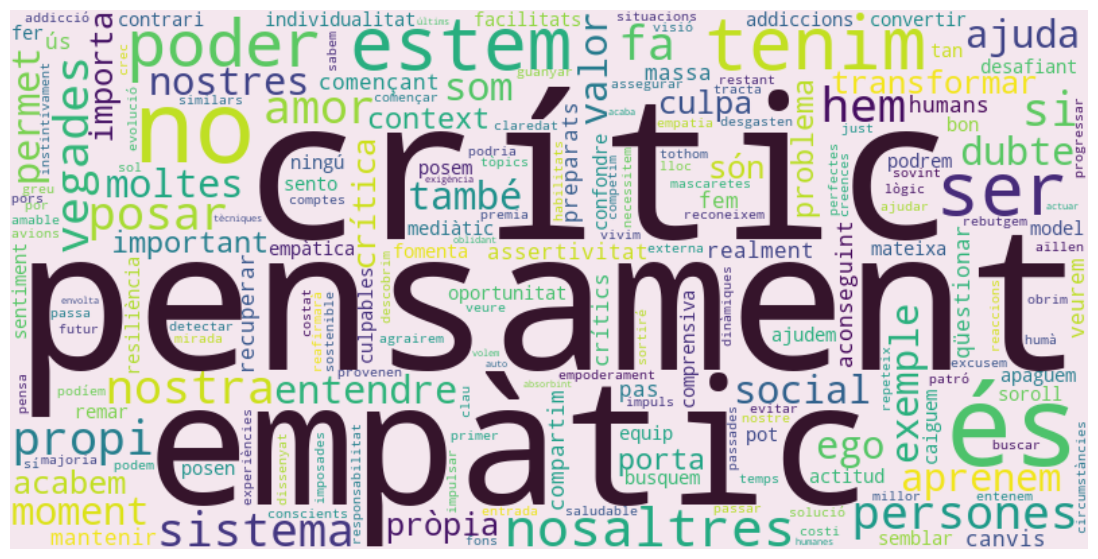

In [6]:
# Import library random
import random

# Identify top3 words
top3 = freq_df.head(3)["word"].tolist()

# Colormap viridis
viridis = plt.colormaps["viridis"]

# Function for colors of the WC in RGB so WordCloud library can understand the colors.
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in top3:
        return "#35142b"   
    else:
        color = viridis(random.random())
        r, g, b, _ = [int(255*c) for c in color]
        return f"rgb({r},{g},{b})"

# Diccionari de freqüències
freq_dict = dict(zip(freq_df["word"], freq_df["freq"]))

# Create the WordCloud
wc = WordCloud(width=800, height=400, background_color="#f4e7ee", color_func=custom_color_func).generate_from_frequencies(freq_dict)

# Show the WC
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
wc.to_file("Downloads/wordcloudPCE.png")